In [1]:
from pandas_datareader import data, wb

## read files

In [ ]:
def read_stocks(stock_file):
    print 'read_stocks...'
    ls_stock_name = []
    f = open(stock_file, 'r')
    for line in f.readlines():
        if line.strip():
            ls_stock_name.append(line.strip().split(' ')[0])
    f.close()

    return ls_stock_name

## get data from yahoo

In [9]:
def get_yahoo_data(stock):
    start = time.time()
    res = True
    _now = datetime.datetime.now()
    try:
        if stock[0] == '$':
            stock = '^' + stock[1:]
        print 'get %s ...' % stock
        f = open(data_path + '/' + stock + ".csv", 'w')
        params = urllib.urlencode(
            {'a': 1, 'b': 1, 'c': 2004, 'd': _now.day, 'e': _now.month, 'f': _now.year, 's': stock})
        url = "http://ichart.finance.yahoo.com/table.csv?%s" % params
        time.sleep(0.5)
        url_get = urllib2.urlopen(url)

        data = url_get.readline()
        while(len(data) > 0):
            # print data
            f.write(data)
            data = url_get.readline()

        f.close()
        print "Fetch [%s] done, cost : %s." % (stock,  (time.time() - start))

    except urllib2.HTTPError:
        res = False
        miss_stock.append(stock)
        print "Unable to fetch data for stock: {0} at {1}".format(stock, url)
    except urllib2.URLError:
        res = False
        miss_stock.append(stock)
        print "URL Error for stock: {0} at {1}".format(stock, url)
    except SocketError as e:
        res = False
        miss_stock.append(stock)
        print "Socket Error for stock: {0} at {1}".format(stock, url)
    except :
        res = False
        miss_stock.append(stock)
        print "Unknown Error for stock: {0} at {1}".format(stock, url)

    return res

## multiple 

In [10]:
def get_yahoo_datas(ls_stock_name):
    print 'get_yahoo_data...'
    if len(ls_stock_name) <= 0:
        return
    print data_path
    print ls_stock_name
    if not (os.access(data_path, os.F_OK)):
        os.makedirs(data_path)

#     pool = mythreadpool.ThreadPool(8)
#     for stock in ls_stock_name:
#         pool.add_job(get_yahoo_data, stock)
#     pool.wait()

    pool = threadpool.ThreadPool(10)
    reqs = threadpool.makeRequests(get_yahoo_data, ls_stock_name)
    [pool.putRequest(req) for req in reqs]
    pool.wait()

    print "All done. Got {0} stocks. Could not get {1}".format(len(ls_stock_name) - len(miss_stock), len(miss_stock))
    return

In [7]:
dict_stock = {}

def ReadStocks(stock_file):
    print 'read_stocks...'

    f = open(stock_file, 'r')
    for line in f.readlines():
        # str_line = str(line)
        item = line.strip().split(' ')
        dict_stock[item[0]] = item[1]

    f.close()

In [8]:
db = DataAccess.DataAccess('Yahoo')
ls_all_syms = db.get_all_symbols()
ls_bad_syms = list(set(ls_stock_code) - set(ls_all_syms))
print 'Bad Stock Code : ', ls_bad_syms

for sym in ls_bad_syms:
    ls_stock_code.remove(sym)

NameError: name 'DataAccess' is not defined

In [ ]:
# Filling the data for NAN
for s_key in ls_keys:
    dict_data[s_key] = dict_data[s_key].fillna(method='ffill')
    dict_data[s_key] = dict_data[s_key].fillna(method='bfill')
    dict_data[s_key] = dict_data[s_key].fillna(1.0)

# sklearn

In [18]:
from sklearn import covariance, cluster
from pandas_datareader import data, wb
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv as dict
csvFile = open("MyData.csv", "r")
reader = csv.reader(csvFile)

# create empty dict
count = 0
index = []
data = []
result = {}
for item in reader:
    # ignore first row
    if reader.line_num == 1:
        del item[0]
        Col = item
        continue
    index.append(item[0])
    del item[0]
    data.append(item)
    count +=1 
        
stock = pd.DataFrame(data,
              index=index,
              columns=Col)
stock = stock.astype(float)
csvFile.close()
stock.head()

,ALXN,AMGN,ANIK,ARWR,BIIB,CASC,CBM,CELG,GILD,IMGN,INCY,NKTR,PGNX,REGN,RGEN,SPPI,SRPT,TECH,VRTX
1998-01-02,2.96875,11.629442,8.6250,32.5,5.645833,81.000000,10.499326,0.359375,1.110293,0.9375,21.3750,12.84375,13.6875,8.875,1.0312,252.830292,40.875,8.041175,16.6875
1998-01-05,2.96875,11.589016,8.4375,32.5,5.666667,77.623199,10.608409,0.375000,1.135775,1.0937,21.1250,13.93750,13.2500,9.000,1.0937,246.663712,42.750,7.823849,16.5625
1998-01-06,3.00000,11.454260,8.0000,32.5,5.833333,79.873199,10.472054,0.377604,1.139416,1.3750,20.5000,15.68750,13.2500,8.500,1.0312,234.330521,42.750,7.769514,16.4375
1998-01-07,3.00000,11.467735,8.1875,32.5,5.708333,75.373199,10.335700,0.401042,1.132135,1.8750,20.4375,15.50000,13.7500,8.250,1.0625,234.330521,42.750,7.769514,16.3125
1998-01-08,2.93750,11.508163,7.9375,32.5,5.875000,75.373199,10.199341,0.380208,1.150337,1.6250,20.1250,16.00000,13.6875,8.250,1.0312,234.330521,39.375,8.244902,16.5625


In [3]:
print type(stock['ALXN'][1])
print (stock['ALXN'][1])
# print open.iloc[:3, 1:3]
print stock.std(0)

<type 'numpy.float64'>
2.96875
ALXN     59.160008
AMGN     41.701678
ANIK     15.191046
ARWR     25.759195
BIIB    110.420005
CASC     84.075302
CBM      13.959757
CELG     39.995632
GILD     30.622772
IMGN      5.443050
INCY     34.973029
NKTR      9.192635
PGNX     10.314399
REGN    161.945397
RGEN     10.718563
SPPI     94.715798
SRPT     17.268434
TECH     28.697944
VRTX     36.191921
dtype: float64


In [4]:
x = stock/stock.std(0)
edge_model = covariance.GraphLassoCV()
edge_model.fit(x)
centers, labels = cluster.affinity_propagation(edge_model.covariance_)

In [5]:
print type(centers)
col_center = []
for i in centers:
    col_center.append(Col[i])
print col_center

<type 'numpy.ndarray'>
['CASC', 'IMGN', 'REGN']


In [17]:
n_labels = labels.max()
print 'Centers :', ', '.join( col_center )

for i in range(n_labels + 1):
    print('Cluster %i: %s' %
          ((i + 1), ', '.join([Col[key]
                               for key in range(len(labels)) 
                               if labels[key]==i])))

Centers : CASC, IMGN, REGN
Cluster 1: ARWR, CASC, NKTR, PGNX, SPPI, SRPT
Cluster 2: IMGN
Cluster 3: ALXN, AMGN, ANIK, BIIB, CBM, CELG, GILD, INCY, REGN, RGEN, TECH, VRTX


# Draw plot

19
[-2894.526690111734, -3458.389011403475, -2410.472177808319, -2721.6393222976076, -3955.727218879776, -2027.1240759736081]


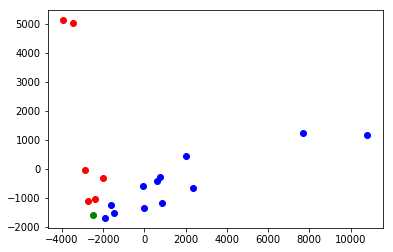

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(stock.transpose())   #载入N维
print len(newData[:,0])
x1 = [newData[key,0]
      for key in range(len(labels)) if labels[key]==0]
y1 = [newData[key,1]
      for key in range(len(labels)) if labels[key]==0]
x2 = [newData[key,0]
      for key in range(len(labels)) if labels[key]==1]
y2 = [newData[key,1]
      for key in range(len(labels)) if labels[key]==1]
x3 = [newData[key,0]
      for key in range(len(labels)) if labels[key]==2]
y3 = [newData[key,1]
      for key in range(len(labels)) if labels[key]==2]
print x1
plt.plot(x1, y1, 'or') 
plt.plot(x2, y2, 'og')
plt.plot(x3, y3, 'ob')
plt.show()